This demonstration will show how to reproject the NEMO velocities for plotting.

NEMO velocities are usually calculated and saved in along grid i and j directions. This causes an issue when plotting velocities as vectors on a map where it is assumed that i and j velocities point eastwards and northwards.

There are additonal isses when plotting quivers over the poles that we will cover.

In [1]:
import coast
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

c:\Users\benbar\AppData\Local\anaconda3\envs\coast\lib\site-packages\utide\harmonics.py:16: RuntimeWarning: invalid value encountered in cast
  nshallow = np.ma.masked_invalid(const.nshallow).astype(int)
c:\Users\benbar\AppData\Local\anaconda3\envs\coast\lib\site-packages\utide\harmonics.py:17: RuntimeWarning: invalid value encountered in cast
  ishallow = np.ma.masked_invalid(const.ishallow).astype(int) - 1


### Usage of coast._utils.plot_util.py.

Plotting quivers

In [6]:
root = "../../../../"
# Paths to a single or multiple data files.
dn_files = root + "./example_files/"
fn_nemo_dat_t = dn_files + "HadGEM3-GC31-HH_hist_thetao.nc"
fn_nemo_dat_u = dn_files + "HadGEM3-GC31-HH_hist_uo.nc"
fn_nemo_dat_v = dn_files + "HadGEM3-GC31-HH_hist_vo.nc"
fn_nemo_config_t = root + "./config/gc31_nemo_grid_t.json"
fn_nemo_config_u = root + "./config/gc31_nemo_grid_u.json"
fn_nemo_config_v = root + "./config/gc31_nemo_grid_v.json"
# Set path for domain file if required.
fn_nemo_dom = dn_files + "eORCA12_v2.4_domain.nc"
# Define output filepath (optional: None or str)
fn_out = './quiver_plot.png'

# Read in multiyear data (This example uses NEMO data from a single file.)
nemo_data_t = coast.Gridded(fn_data=fn_nemo_dat_t,
                          fn_domain=fn_nemo_dom,
                          config=fn_nemo_config_t,
                          ).dataset
nemo_data_u = coast.Gridded(fn_data=fn_nemo_dat_u,
                          fn_domain=fn_nemo_dom,
                          config=fn_nemo_config_u,
                          ).dataset
nemo_data_v = coast.Gridded(fn_data=fn_nemo_dat_v,
                          fn_domain=fn_nemo_dom,
                          config=fn_nemo_config_v,
                          ).dataset

C:\Users\benbar\Documents\Projects\COAsT\COAsT\coast\data\gridded.py:222: UserWarning: The model domain loaded, '../../../.././example_files/eORCA12_v2.4_domain.nc', does not contain the bathy_metry' variable. This will result in the NEMO.dataset.bathymetry variable being set to zero, which may result in unexpected behaviour from routines that require this variable.
  warnings.warn(


IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

Select surface u and v as an example:

In [10]:
# Select specific data variables.
data_u = nemo_data_u[["u_velocity"]]
data_v = nemo_data_v[["v_velocity"]]

# Select one time step and surface currents
data_u = data_u.isel(t_dim=0, z_dim=0)
data_v = data_v.isel(t_dim=0, z_dim=0)

# Calculate speed
speed = (data_u.to_array().values[0, :, :] ** 2 + data_v.to_array().values[0, :, :] ** 2) ** 0.5 

# Calculate adjustment
u_new, v_new = coast._utils.plot_util.velocity_grid_to_geo(
        nemo_data_t.longitude.values, nemo_data_t.latitude.values, 
        data_u.to_array().values[0, :, :], data_v.to_array().values[0, :, :], polar_stereo=False)


KeyboardInterrupt: 

Below shows the u and v velocities when plotted with and without adjustment.

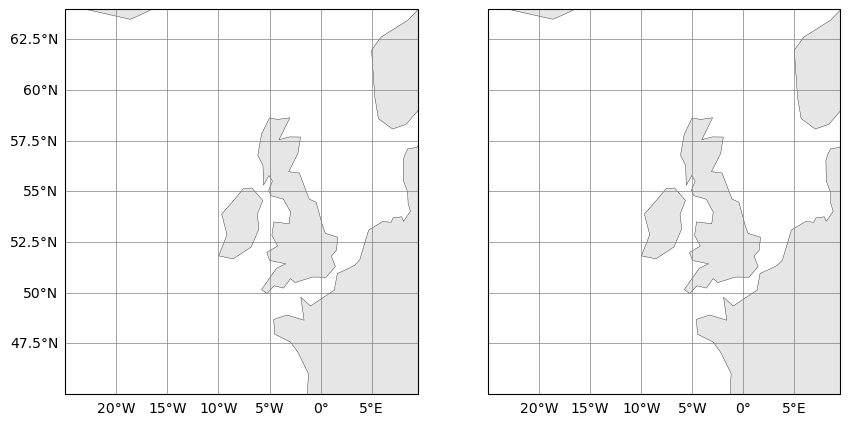

In [9]:
# Subplot axes settings
n_r = 1  # Number of subplot rows
n_c = 2  # Number of subplot columns
figsize = (10, 5)  # Figure size
lonbounds = [-25, 9.5]  # Longitude bounds
latbounds = [45, 64]  # Latitude bounds
subplot_padding = 0.5  # Amount of vertical and horizontal padding between plots
fig_pad = (0.075, 0.075, 0.1, 0.1)  # Figure padding (left, top, right, bottom)

# Labels and Titles
fig_title = "SST Errors"  # Whole figure title

# Create plot and flatten axis array
f, a = coast.plot_util.create_geo_subplots(lonbounds, latbounds, n_r, n_c, figsize=figsize)
a_flat = a.flatten()

# Data projection
data_crs = ccrs.PlateCarree()

a_flat[0].pcolormesh(nemo_data_t.longitude.values, nemo_data_t.latitude.values, speed, transform=data_crs)
a_flat[0].quiver(nemo_data_t.longitude.values, nemo_data_t.latitude.values, 
    data_u.to_array().values[0, :, :], data_v.to_array().values[0, :, :], 
    color='w', transform=data_crs, angles='xy', regrid_shape=40)

a_flat[1].pcolormesh(nemo_data_t.longitude.values, nemo_data_t.latitude.values, speed, transform=data_crs)
a_flat[1].quiver(nemo_data_t.longitude.values, nemo_data_t.latitude.values, 
    u_new, v_new, 
    color='w', transform=data_crs, angles='xy', regrid_shape=40)

f.tight_layout(w_pad=subplot_padding, h_pad=subplot_padding)
f.subplots_adjust(left=(fig_pad[0]), bottom=(fig_pad[1]), right=(1 - fig_pad[2]), top=(1 - fig_pad[3]))

f.savefig(fn_out)